In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
pn.extension()

file_path = 'covid_meetgegevens_export.tsv'
data = pd.read_table(file_path, sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PATIENT_ID          1616 non-null   float64
 1   MEETDATUM           1617 non-null   object 
 2   VCO2_MLMIN          1617 non-null   int64  
 3   EE_BEADEMINGSMACH   1617 non-null   float64
 4   VOEDING_ML24H       1594 non-null   float64
 5   MAAGRETENTIE_ML24H  1603 non-null   float64
 6   PROPOFOL_ML24H      1603 non-null   float64
 7   BUIKLIGGING         1603 non-null   object 
 8   ID                  1617 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 113.8+ KB


### In leven 3 en 6 maanden 

In het bestand covid_patienten_export.tsv is te zien dat in de laatste 2 kolommen "ja" of "nee" staat.
Deze kolommen gaan over of de patient op de 3 en 6 maanden mark nog in leven zijn.
zoals te zien is, is het altijd het geval dat als er bij kolom 3 maand "nee" staat dat er dan in de kolom 6 maand ook "nee" staat, logisch. Het is ook het geval dat als er in de eerste kolom "ja" staat dat er dan ook in de 2e kolom "ja" staat. Het is dus niet het geval dat er een "ja" bij de eerste kolom staat en een "nee" bij de 2e kolom staat. Aan deze kolommnen heb je dus in princiepe niks. De patient komt of binnen 3 maanden te overlijden of helemaal niet in 6 maanden. 


In [3]:
def render_print(x):
    return x*x
interactive_panel = pn.interact(render_print, x=5)
interactive_panel

BokehModel(combine_events=True, render_bundle={'docs_json': {'8113c263-e67d-4229-9c62-4b8e0d1a1af9': {'version…

Launching server at http://localhost:59431


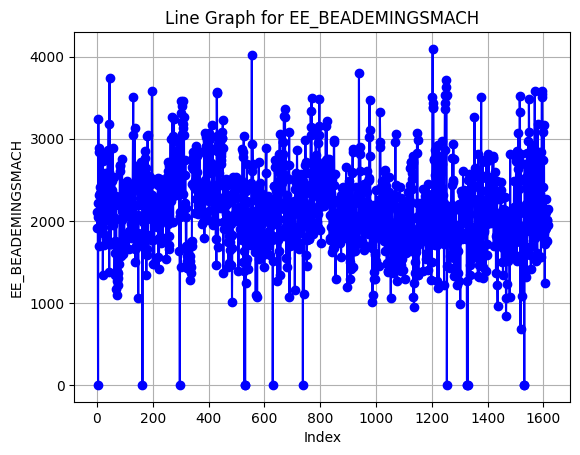

In [5]:
import pandas as pd
import panel as pn
import numpy as np


file_path = 'covid_meetgegevens_export.tsv'
data_meet = pd.read_table(file_path, sep='\t')


column_name = "EE_BEADEMINGSMACH"
column_data = data_meet[column_name]


def line_plot():
    plt.plot(column_data.index, column_data, marker='o', linestyle='-', color='b')
    plt.title(f'Line Graph for {column_name}')
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.grid(True)
    return pn.pane.Matplotlib()
plot = line_plot

app = pn.Column(
    plot
)
app.show()

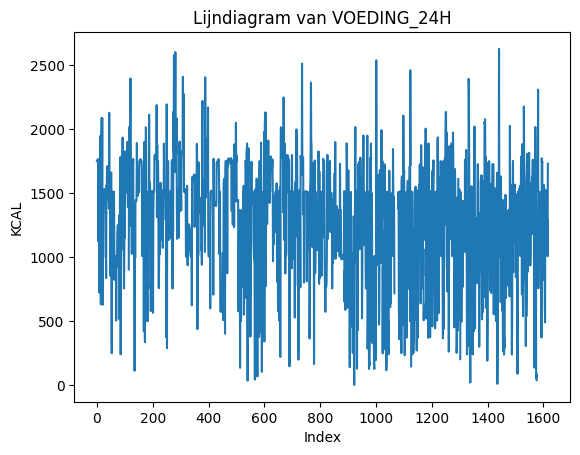

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Lees de gegevens in
file_path = 'covid_meetgegevens_export.tsv'
data_meet = pd.read_table(file_path, sep='\t')

# Maak een lijngrafiek van de kolom 'VOEDING_24H'
plt.plot(data_meet['VOEDING_ML24H'])

# Voeg labels toe aan de assen
plt.xlabel('Index')
plt.ylabel('KCAL')

# Voeg een titel toe aan de grafiek
plt.title('Lijndiagram van VOEDING_24H')

# Toon de grafiek
plt.show()


In de bovenstaande grafiek is de line graph van de voeding die nodig is per dag in kcal te zien.
Op de x-as zijn de meet momenten te zien en op de y-as is het aantal kcal te zien. 

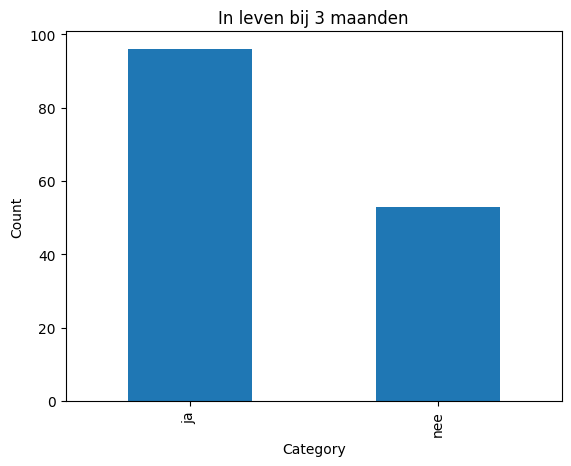

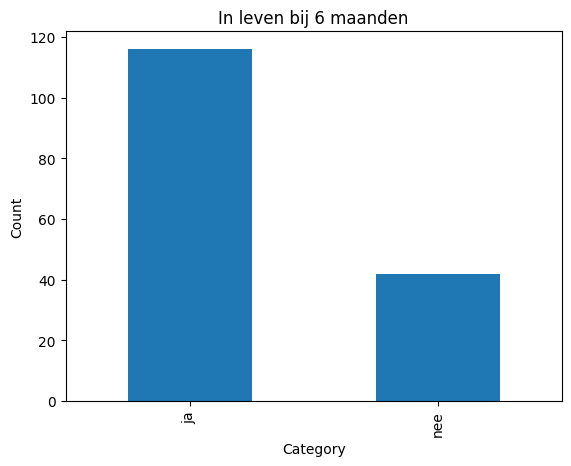

In [6]:


file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')

if 'IN_LEVEN_3_MAANDEN' in data_p.columns:
    
    counts = data_p['IN_LEVEN_3_MAANDEN'].value_counts()

   
    counts.plot(kind='bar')
    
    plt.title('In leven bij 3 maanden')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()
    
if 'IN_LEVEN_6_MAANDEN' in data_p.columns:
    data_p['IN_LEVEN_6_MAANDEN'] = data_p['IN_LEVEN_6_MAANDEN'].fillna('ja')


    counts = data_p['IN_LEVEN_6_MAANDEN'].value_counts()

    counts.plot(kind='bar')
    
    plt.title('In leven bij 6 maanden')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

### Maagretentie 
De kolom maagretentie bekijkt hoe snel het voedsel de maag weer verlaat, er is door de opdrachtgever om deze data buiten het onderzoek te laten. Dus deze kolom is leeg.

### APACHE SCORE

De apache score geeft de ernst van de prognose van een ziekte weer. Hoe hoger deze score hoe groter de ernst. 

In [7]:
import pandas as pd

file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')

# Filter the DataFrame for rows where GESLACHT is 'v'
female_data = data_p[data_p['GESLACHT'] == 'v']

# Calculate the average GEWICHT for females
average_gewicht_female = female_data['GEWICHT'].mean()

print("Average GEWICHT for females:", average_gewicht_female)


Average GEWICHT for females: 87.18181818181819


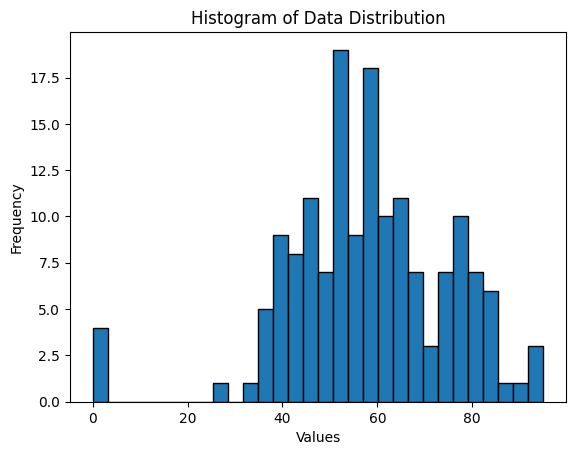

In [8]:
file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')

plt.hist(data_p['APACHE_IV_SCORE'], bins=30, edgecolor='black')
plt.title('Histogram of Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


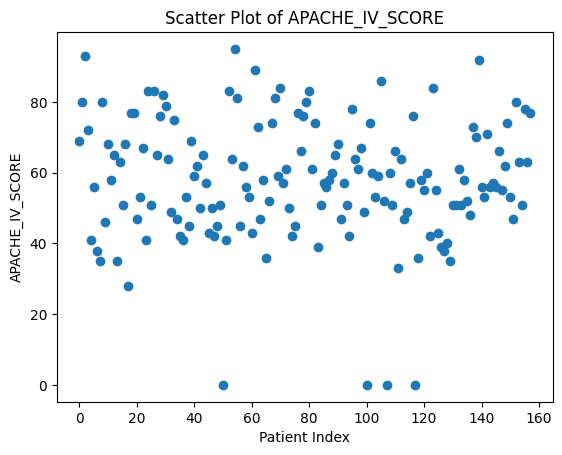

In [9]:


file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')

if 'APACHE_IV_SCORE' in data_p.columns:
    plt.scatter(data_p.index, data_p['APACHE_IV_SCORE'])
    plt.title('Scatter Plot of APACHE_IV_SCORE')
    plt.xlabel('Patient Index')
    plt.ylabel('APACHE_IV_SCORE')
    plt.show()

### APACHE score en de levend/dood status van de patient combineren.


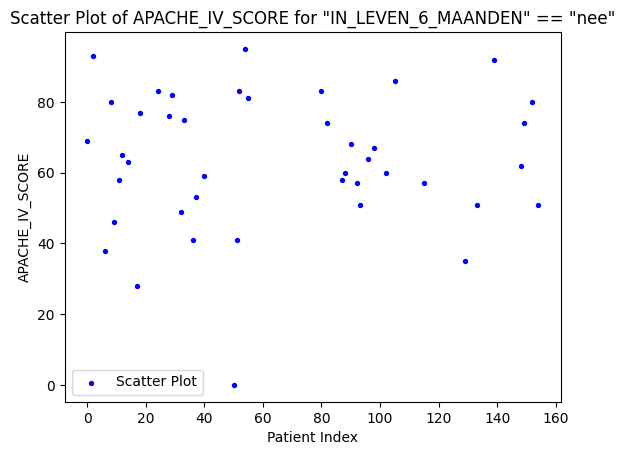

Average APACHE_IV_SCORE for "IN_LEVEN_6_MAANDEN" == "nee": 63.45238095238095


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')
data_p['IN_LEVEN_6_MAANDEN'] = data_p['IN_LEVEN_6_MAANDEN'].fillna('ja')

filtered_data = data_p[data_p["IN_LEVEN_6_MAANDEN"] == "nee"]

# Create Scatter Plot
plt.scatter(filtered_data.index, filtered_data['APACHE_IV_SCORE'], s=8, c='blue', label='Scatter Plot')

plt.title('Scatter Plot of APACHE_IV_SCORE for "IN_LEVEN_6_MAANDEN" == "nee"')
plt.xlabel('Patient Index')
plt.ylabel('APACHE_IV_SCORE')
plt.legend()

# Show plot
plt.show()

# Calculate and Print Average APACHE_IV_SCORE
average_apache_score = filtered_data['APACHE_IV_SCORE'].mean()
print(f'Average APACHE_IV_SCORE for "IN_LEVEN_6_MAANDEN" == "nee": {average_apache_score}')


### Leeftijd tegenover apache score 

In [ ]:
file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')
from scipy.stats import spearmanr
import pandas as pd


data_p[['LEEFTIJD', 'APACHE_IV_SCORE']] = data_p[['LEEFTIJD', 'APACHE_IV_SCORE']].fillna(0)  
data_p[['LEEFTIJD', 'APACHE_IV_SCORE']] = data_p[['LEEFTIJD', 'APACHE_IV_SCORE']].replace([np.inf, -np.inf], 0)  


correlation, p_value = spearmanr(data_p['LEEFTIJD'], data_p['APACHE_IV_SCORE'])

print(f"Correlation between LEEFTIJD and APACHE_IV_SCORE: {correlation}")
print(f"P-value: {p_value}")




Correlation between LEEFTIJD and APACHE_IV_SCORE: 0.2948292251390119
P-value: 0.00016960323367335017


De p-value is onder de 0.05 dus er kan gesproken worden van een correlatie tussen de apache score en de leeftijd.

#### Visualisatie van APACHE tegenover leeftijd 

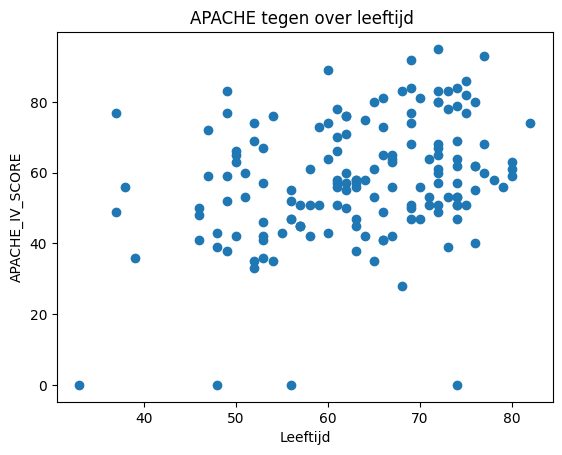

In [14]:
file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')

plt.scatter(data_p['LEEFTIJD'],data_p['APACHE_IV_SCORE'])
plt.title('APACHE tegen over leeftijd ')
plt.xlabel('Leeftijd')
plt.ylabel('APACHE_IV_SCORE')
plt.show()

Hierboven is de apache score tegenover de leeftijd geplot. 
Hieruit kan je concluderen dat er geen correlatie is.
Dit spreekt de p-value dus tegen.

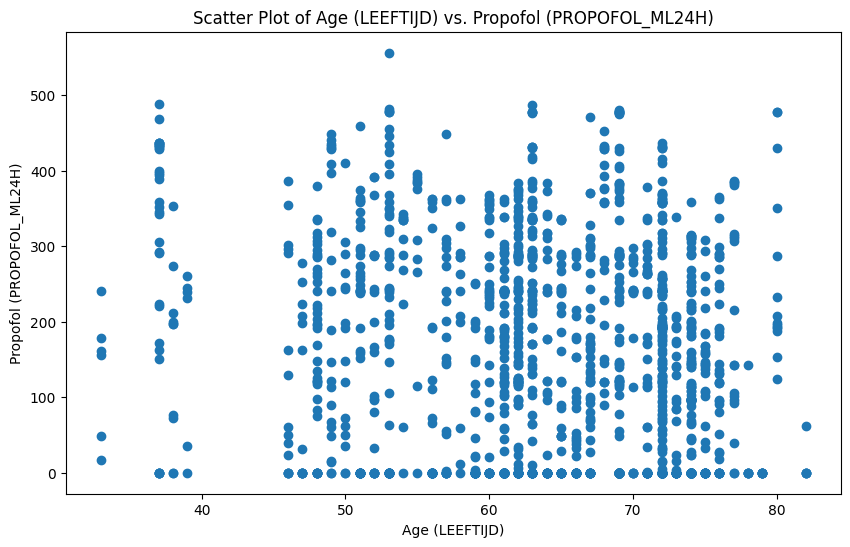

In [15]:

covid_patienten_data = pd.read_csv('covid_patienten_export.tsv', delimiter='\t')
covid_meetgegevens_data = pd.read_csv('covid_meetgegevens_export.tsv', delimiter='\t')

merged_data = pd.merge(covid_patienten_data, covid_meetgegevens_data, on='PATIENT_ID', how='inner')


plt.figure(figsize=(10, 6))

plt.scatter(merged_data['LEEFTIJD'], merged_data['PROPOFOL_ML24H'])
plt.title('Scatter Plot of Age (LEEFTIJD) vs. Propofol (PROPOFOL_ML24H)')
plt.xlabel('Age (LEEFTIJD)')
plt.ylabel('Propofol (PROPOFOL_ML24H)')


plt.show()


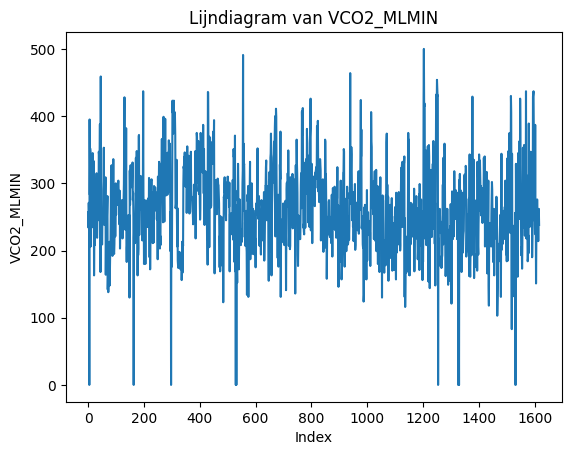

In [19]:

# Lees de gegevens in
file_path = 'covid_meetgegevens_export.tsv'
data_meet = pd.read_table(file_path, sep='\t')

# Maak een lijngrafiek van de kolom 'VCO2_MLMIN'
plt.plot(data_meet['VCO2_MLMIN'])

# Voeg labels toe aan de assen
plt.xlabel('Index')
plt.ylabel('VCO2_MLMIN')

# Voeg een titel toe aan de grafiek
plt.title('Lijndiagram van VCO2_MLMIN')

# Toon de grafiek
plt.show()


Hier is de line graph te zien van de VCO2_MLMIN, met op de x-as de meetmomenten en op de y-as de VCO2 in milliter per minuut.
Dit geeft aan wat de long inhoud is van de patient, de long inhoud staat natuurlijk direct op covid en hebben veel met elkaar te maken. 

C:\Users\roord\AppData\Local\Temp\ipykernel_15648\3779568431.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['IN_LEVEN_3_MAANDEN'] = filtered_data['IN_LEVEN_3_MAANDEN'].map({'ja': 1, 'nee': 0})


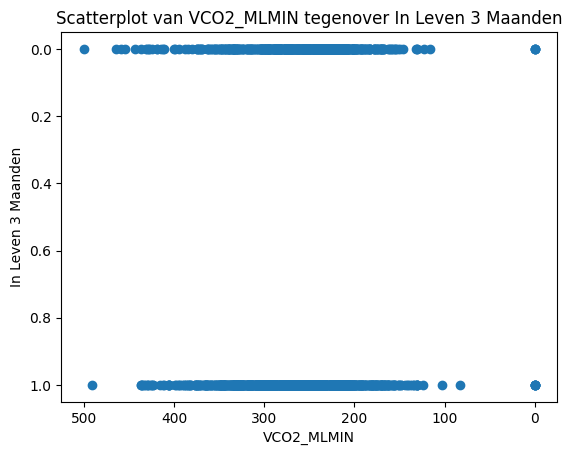

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Lees de gegevens in
file_path_patienten = r'C:\Users\roord\OneDrive\Documenten\School\Periode_6\Covid_data\covid_patienten_export.tsv'
file_path_meetgegevens = r'C:\Users\roord\OneDrive\Documenten\School\Periode_6\Covid_data\covid_meetgegevens_export.tsv'

data_patienten = pd.read_table(file_path_patienten, sep='\t')
data_meetgegevens = pd.read_table(file_path_meetgegevens, sep='\t')

# Samenvoegen op basis van PATIENT_ID
merged_data = pd.merge(data_patienten, data_meetgegevens, on='PATIENT_ID', how='inner')

# Filter de relevante kolommen
selected_columns = ['IN_LEVEN_3_MAANDEN', 'VCO2_MLMIN']
filtered_data = merged_data[selected_columns]

# Zet 'ja' en 'nee' om naar numerieke waarden
filtered_data['IN_LEVEN_3_MAANDEN'] = filtered_data['IN_LEVEN_3_MAANDEN'].map({'ja': 1, 'nee': 0})

# Plot de data
plt.scatter(filtered_data['VCO2_MLMIN'], filtered_data['IN_LEVEN_3_MAANDEN'])
plt.xlabel('VCO2_MLMIN')
plt.ylabel('In Leven 3 Maanden')
plt.title('Scatterplot van VCO2_MLMIN tegenover In Leven 3 Maanden')

# Draai de assen om
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.show()


Hier boven staat een scatterplot
De scatter plot laat zien op de x-as de VCO2 
en op de y-as of de patient nog leefd.
1 betekent dat de patient nog leefd en 0 betekent dat ie is overleden.


C:\Users\roord\AppData\Local\Temp\ipykernel_15648\238075160.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['IN_LEVEN_3_MAANDEN'] = filtered_data['IN_LEVEN_3_MAANDEN'].map({'ja': 1, 'nee': 0})


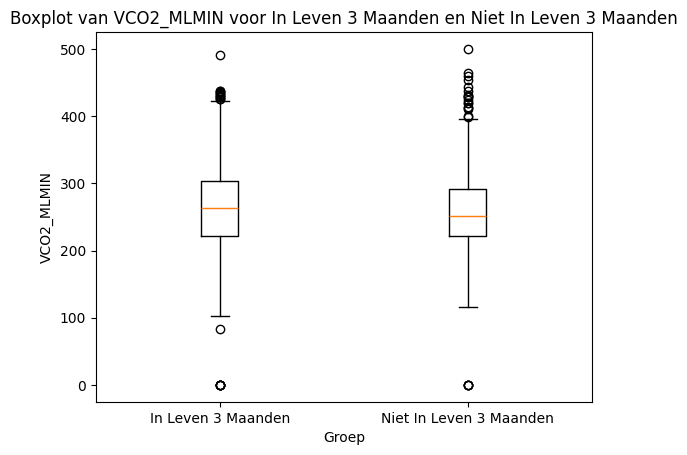

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Lees de gegevens in
file_path_patienten = r'C:\Users\roord\OneDrive\Documenten\School\Periode_6\Covid_data\covid_patienten_export.tsv'
file_path_meetgegevens = r'C:\Users\roord\OneDrive\Documenten\School\Periode_6\Covid_data\covid_meetgegevens_export.tsv'

data_patienten = pd.read_table(file_path_patienten, sep='\t')
data_meetgegevens = pd.read_table(file_path_meetgegevens, sep='\t')

# Samenvoegen op basis van PATIENT_ID
merged_data = pd.merge(data_patienten, data_meetgegevens, on='PATIENT_ID', how='inner')

# Filter de relevante kolommen
selected_columns = ['IN_LEVEN_3_MAANDEN', 'VCO2_MLMIN']
filtered_data = merged_data[selected_columns]

# Zet 'ja' en 'nee' om naar numerieke waarden
filtered_data['IN_LEVEN_3_MAANDEN'] = filtered_data['IN_LEVEN_3_MAANDEN'].map({'ja': 1, 'nee': 0})

# Maak een boxplot
plt.boxplot([filtered_data[filtered_data['IN_LEVEN_3_MAANDEN'] == 1]['VCO2_MLMIN'],
             filtered_data[filtered_data['IN_LEVEN_3_MAANDEN'] == 0]['VCO2_MLMIN']],
            labels=['In Leven 3 Maanden', 'Niet In Leven 3 Maanden'])

plt.xlabel('Groep')
plt.ylabel('VCO2_MLMIN')
plt.title('Boxplot van VCO2_MLMIN voor In Leven 3 Maanden en Niet In Leven 3 Maanden')
plt.show()


Hierboven staat een boxplot.
De boxplot laat zien op de x-as de VCO2 
en op de y-as of de patient nog leefd.
Er is spraake van een hogere VCO2 bij mensen die leven dan bij mensen die zijn overleden.